*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

Maslennikov Nikita, MIPT student [github](https://github.com/masl3noki)

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.



```
# Выбран кодовый формат
```

Useful links:
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)

## ex. 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N
$$

$$
\frac{dy}{dx} = \frac{d(x^Tx)}{dx} = \frac{d(x^TEx)}{dx} = (E+E^T)x = 2Ex = 2x,
$$

where $$ \frac{d(x^TEx)}{dx} = (E+E^T)x $$ as written in file [1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)

## ex. 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$

$$
\frac{dy}{dA} = \frac{d(tr(AB))}{dA} = B^T
$$

## ex. 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N}
$$

$$
\frac{dy}{dx} = \frac{d(x^TAc)}{dx} = \frac{d(x^TAc)}{dA} * \frac{dA}{dx} = xc^T * \frac{dA}{dx}
$$

$$
\frac{dy}{dA} = \frac{d(x^TAc)}{dA} = xc^T
$$

Hint for the latter (one of the ways): use *ex. 2* result and the fact
$$
tr(ABC) = tr (CAB)
$$

## ex. 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ?
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T)
$$
it is easy to derive gradients (you can find it in one of the refs).

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="https://github.com/girafe-ai/ml-course/blob/22f_basic/homeworks/lab01_ml_pipeline/grad.png?raw=1">
(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule!
let $ F = AS $

**Find**
$$
\frac{dJ}{dF} = \frac{d(|| X - F ||_F^2)}{dF} = \frac{d(tr(X-F)(X-F)^T)}{dF}
= \frac{d(tr(X-F)^T(X-F))}{dF}
= \\ = \frac{d(tr(X^T*X - X^T*F - F^T*X + F^T*F)}{dF}
= \\ = \frac{d(tr(X^T*X))}{dF} - \frac{d(tr((X^T*F)^T))}{dF} - \frac{d(tr(F^T*X))}{dF} + \frac{d(tr(F*F^T))}{dF}
= \\ = 0 - 2\frac{d(tr(F^T*X))}{dF} + 2F = 2(F - X)
$$

and
$$
\frac{dF}{dS} = \frac{d(AS)}{dS} = A^T
$$
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  2(AS-X) * A^T = 2ASA^T - 2XA^T
$$

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*

1) Black color indicates low distances between points, and white color - far distances. Considering the plot (Y-axes for test samples, X-axis for train samples), we can assume that bright rows are so called "mismatch rows", where test data is located far from train data with similar label. In other words, if a test image is different from all the training images, the row will be bright.

2) Similar causation: column will be bright if (almost) all training pictures would not match test pictures: if all of the test samples are different from a single train sample, we could get a bright column. In example, we could get a white column if one of our sample from train dataset will represent character "~".




### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$,

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)} = \frac{1}{hw}\sum_{i=1}^{h}\sum_{j=1}^{w} \mu_{ij}$$
And the pixel-wise mean $\mu_{ij}$ across all images is
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:* 1, 2, 3

*Your Explanation:*

1. $\mu$ will cancel out during distance computation because both pixel values are modified by the same constant:

$$||\tilde{p}_{ij}^{(k)} - \tilde{p}_{ij}^{(k')}|| = ||({p}_{ij}^{(k)} - \mu) - ({p}_{ij}^{(k)'} - \mu)|| = ||{p}_{ij}^{(k)} - {p}_{ij}^{(k')}||$$

2. same explanation:

$$||\tilde{p}_{ij}^{(k)} - \tilde{p}_{ij}^{(k')}|| = ||({p}_{ij}^{(k)} - \mu_{ij}) - ({p}_{ij}^{(k)'} - \mu_{ij})|| = ||{p}_{ij}^{(k)} - {p}_{ij}^{(k')}||$$

3. What would happen with this preprocessing step:

$$||\frac{({p}_{ij}^{(k)} - \mu)}{\sigma} - \frac{({p}_{ij}^{(k')} - \mu)}{\sigma}|| = \frac{1}{\sigma} ||{p}_{ij}^{(k)} - {p}_{ij}^{(k')}||$$

This only affects the scale of distances, therefore performance of NN classificator with $L_1$ norm will not be affected.

4. However, implementing this preprocessing step will result in different scales of distances - model precision will be affected!

5. Rotation. While $L_2$ distances wont be affected by this preprocessing step, $L_1$ distances will. It can be described by the following plots:

In [1]:
from manim import *

Manim Community v0.18.0

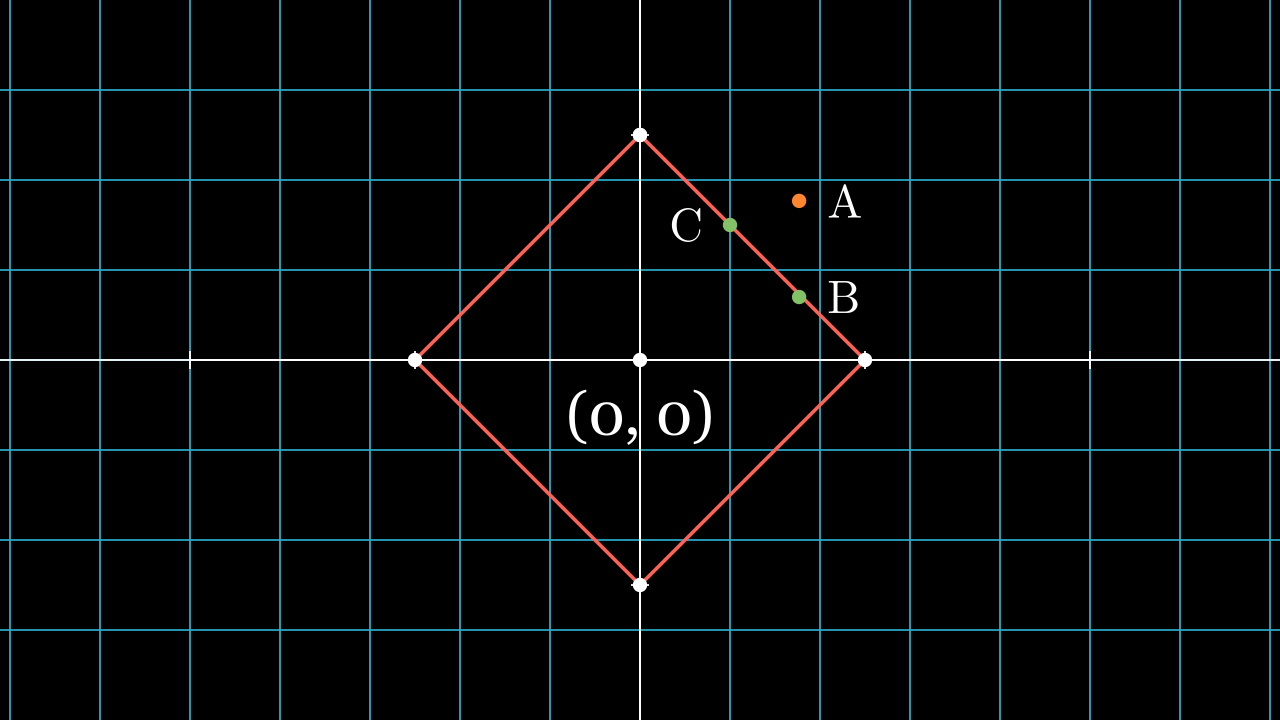

In [4]:
%%manim -qm -v WARNING L1_noRotate

class L1_noRotate(Scene):
    def construct(self):
        #self.camera.background_color = WHITE
        dot = Dot(ORIGIN)

        numberplane = NumberPlane()
        origin_text = Text('(0, 0)').next_to(dot, DOWN)

        ax_1 = Axes(
            #axis_config={"stroke_width": 5, "color": BLACK},
            x_range=[-10, 10, 5],
            y_range=[-10, 10, 5],
            x_length=10,
            y_length=10,
            tips=False,
        )

        x_vals = [0, 5, 0, -5, 0]
        y_vals = [5, 0, -5, 0, 5]
        graph_1 = ax_1.plot_line_graph(x_values=x_vals, y_values=y_vals, line_color=RED_C)

        dot_1 = Dot((1.768, 1.768, 0), color=ORANGE)
        dot_with_label_1 = Group(dot_1, Tex("A", font_size=50).next_to(dot_1, RIGHT))
        dot_2 = Dot((1.768, 0.7, 0), color=GREEN)
        dot_with_label_2 = Group(dot_2, Tex("B", font_size=50).next_to(dot_2, RIGHT))
        dot_3 = Dot((1, 1.5, 0), color=GREEN)
        dot_with_label_3 = Group(dot_3, Tex("C", font_size=50).next_to(dot_3, LEFT))

        self.add(numberplane)
        self.add(ax_1, graph_1)
        self.add(dot, origin_text)
        self.add(dot_1, dot_2, dot_3)
        self.add(dot_with_label_1, dot_with_label_2, dot_with_label_3)



First plot is axis frame before rotation. Rectangle here (`red`) represents the line with similar distances from any point on that line to the `origin (0, 0)` point. That means that `green` points `B` and `C` have identical distance to the `origin (0, 0)` point, where `orange` point `A` in `Quadrant I` of Coordinate system.

When we rotate the **local** axis (for `red` rectangle) by, i.e., 45 degrees, we'll get different line and distances to previous point will no longer be same. Consider the plot below. Here point `A` has color `green` now and color of point `B` remains the same: thats because if we recalculate `l1 norm` we will have same distances between `{A, B}` and the `origin (0, 0)` point. Point `C` is an outcast now!

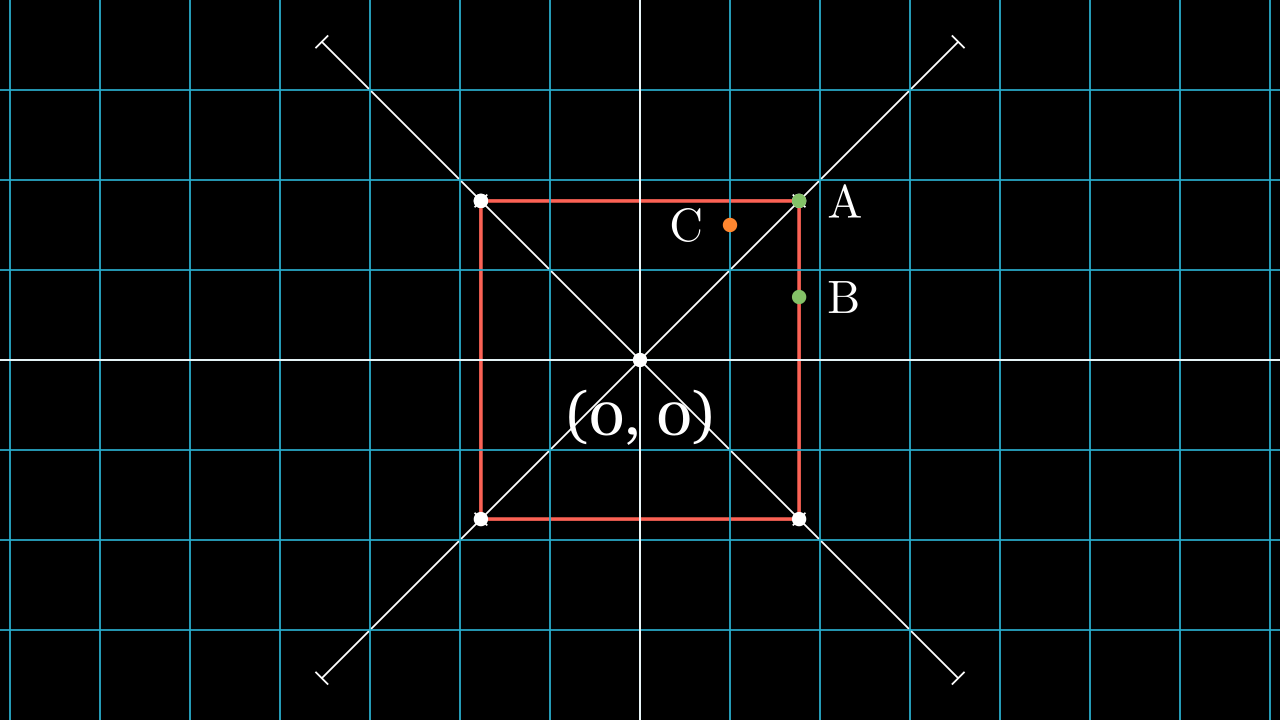

In [116]:
%%manim -qm -v WARNING L1_yesRotate

class L1_yesRotate(Scene):
    def construct(self):
        dot = Dot(ORIGIN)

        numberplane = NumberPlane()
        #numberplane.rotate(45*DEGREES)

        origin_text = Text('(0, 0)').next_to(dot, DOWN)

        ax_1 = Axes(
            x_range=[-10, 10, 5],
            y_range=[-10, 10, 5],
            x_length=10,
            y_length=10,
            tips=False,
        )

        x_vals = [0, 5, 0, -5, 0]
        y_vals = [5, 0, -5, 0, 5]
        graph_1 = ax_1.plot_line_graph(x_values=x_vals, y_values=y_vals, line_color=RED_C)
        graph_1.rotate(45*DEGREES)

        dot_1 = Dot((1.768, 1.768, 0), color=GREEN)
        dot_with_label_1 = Group(dot_1, Tex("A", font_size=50).next_to(dot_1, RIGHT))
        dot_2 = Dot((1.768, 0.7, 0), color=GREEN)
        dot_with_label_2 = Group(dot_2, Tex("B", font_size=50).next_to(dot_2, RIGHT))
        dot_3 = Dot((1, 1.5, 0), color=ORANGE)
        dot_with_label_3 = Group(dot_3, Tex("C", font_size=50).next_to(dot_3, LEFT))

        ax_1.rotate(45*DEGREES)
        #ax_1.move_to(dot_3)

        self.add(graph_1)
        self.add(ax_1)
        self.add(numberplane, dot, origin_text)
        self.add(dot_1, dot_2, dot_3)
        self.add(dot_with_label_1, dot_with_label_2, dot_with_label_3)


## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:* 2, 4


*Your Explanation:*
1. False: The decision boundary is not linear, but rather a polygonal line. By definition, it is not linear because it has a complex shape within an n-dimensional space. 
2. True: Training error is defined as a difference between actual and predicted values, where training data is used to make predictions and the expected output label is used. In the case of the `1-NN` model, predictions are made based on the nearest image in the training set, while in the case of a `5-NN`, predictions are based on the first 5 nearest images. It is possible for a training sample to lead to a training error. 
3. False: A simple explanation for this is that, with 5 neighbors, the model can still make a correct prediction even if it misclassifies a test sample with the wrong label. The `1-NN` model has no room for error. 
4. True: Each test sample is compared to `k` neighbors, so the more hyperparameters `k` increase, the longer it takes to make a prediction. 
5. False: This is because two of the above statements are false.

